In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv(r"Mall_Customers.csv")

# Data Visualisation

# 1.Univariate Analysis

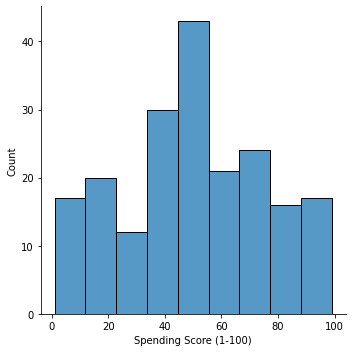

In [9]:
sns.displot(data['Spending Score (1-100)'])

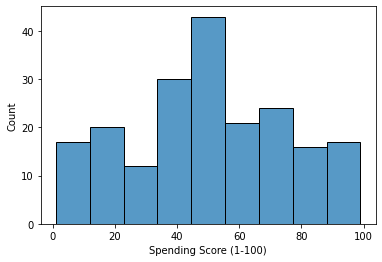

In [10]:
sns.histplot(data['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


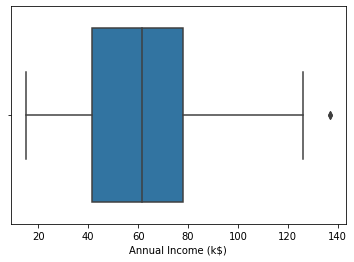

In [12]:
sns.boxplot(data['Annual Income (k$)'])

# Bivariate Analaysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


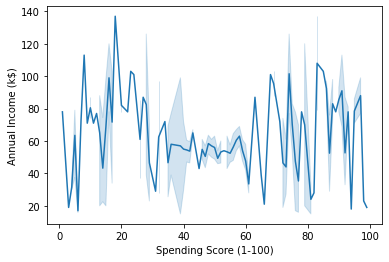

In [13]:
sns.lineplot(data['Spending Score (1-100)'], data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


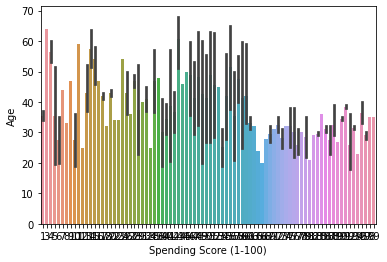

In [14]:
sns.barplot(data['Spending Score (1-100)'], data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


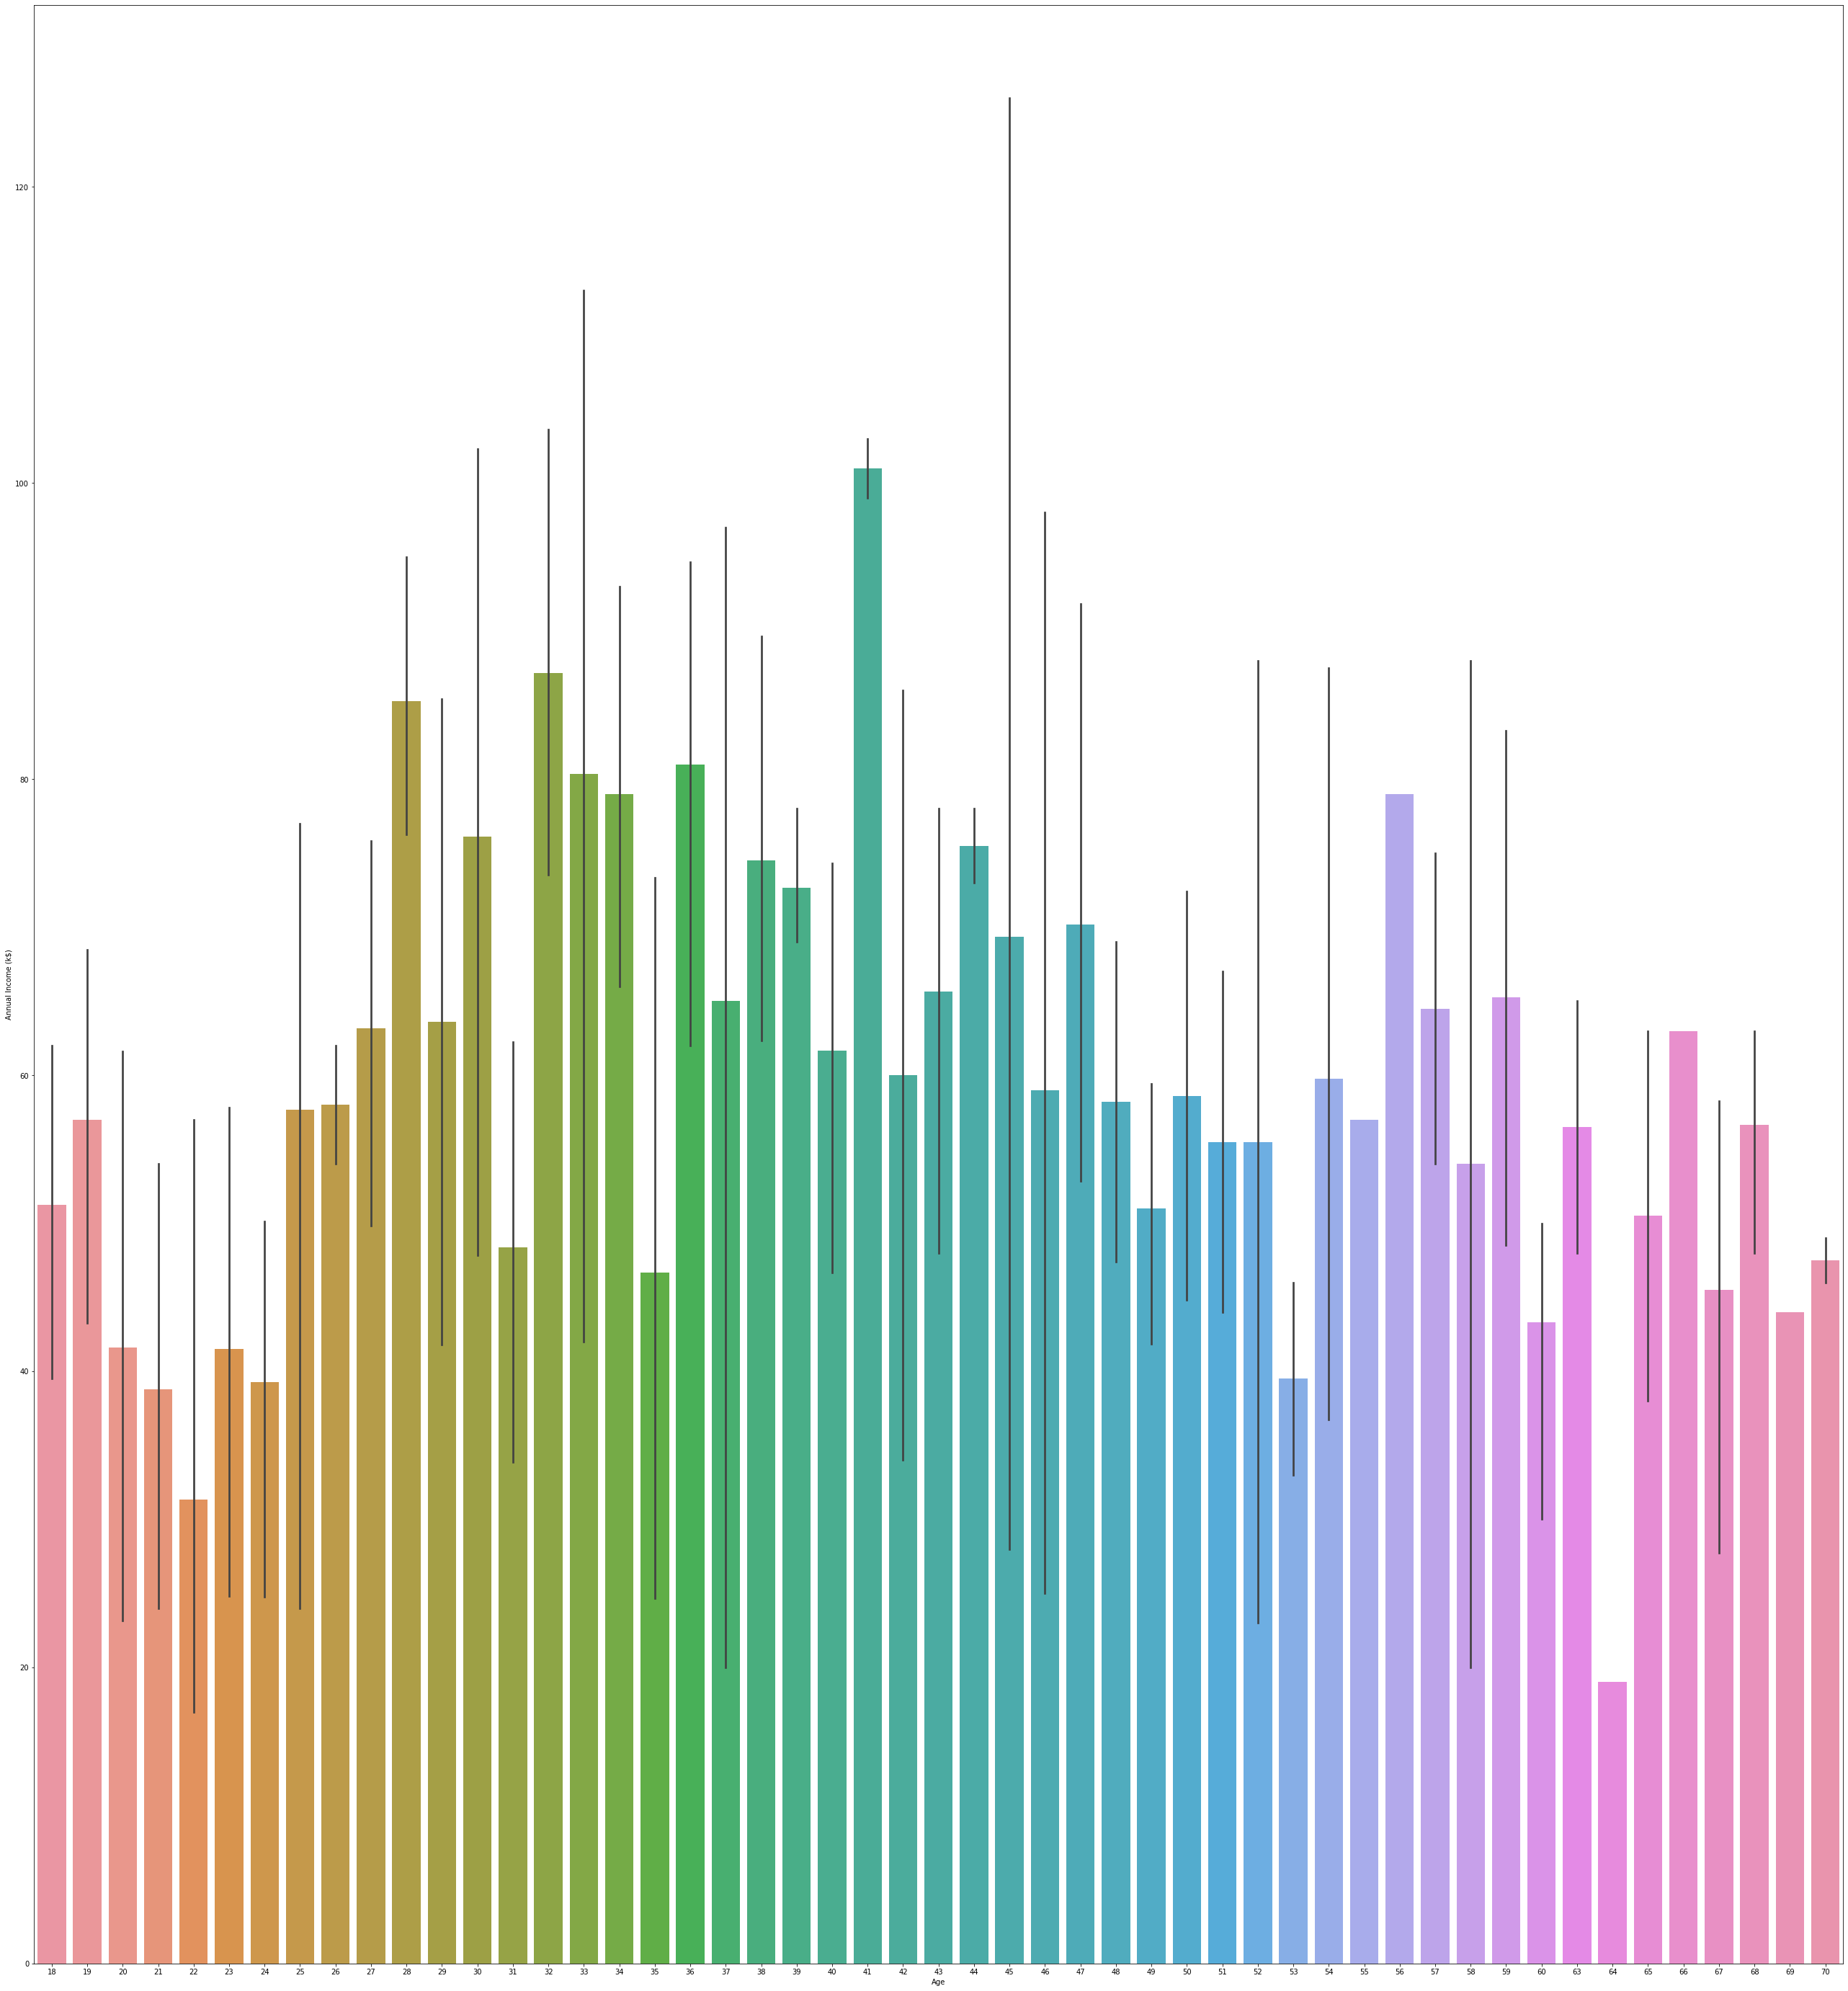

In [15]:
plt.figure(figsize=(45,50))
sns.barplot(data['Age'], data['Annual Income (k$)'])

# Multi variate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


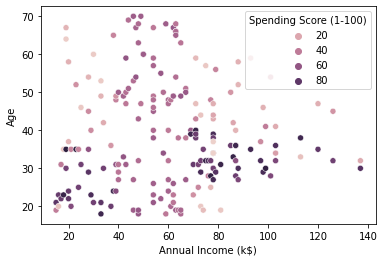

In [16]:
sns.scatterplot(data['Annual Income (k$)'], data['Age'], hue = data['Spending Score (1-100)'])

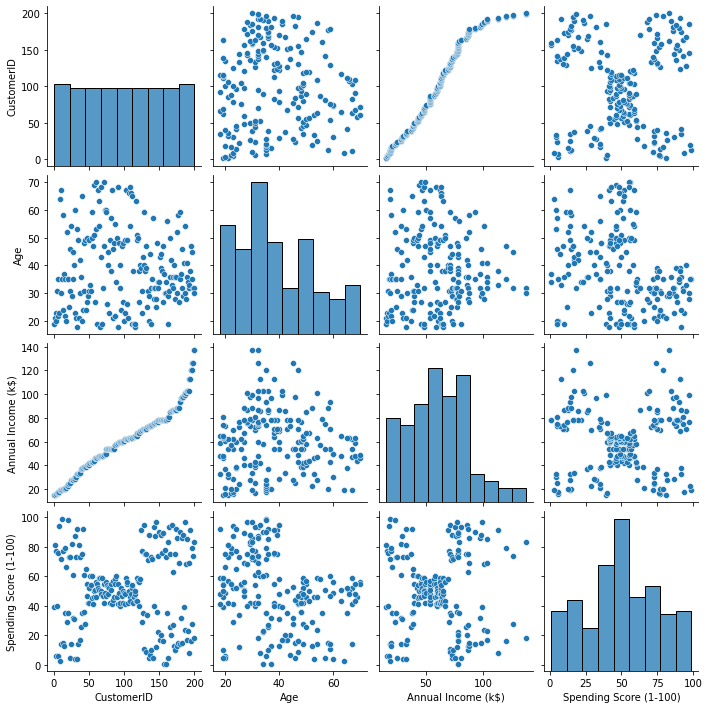

In [17]:
sns.pairplot(data)

# descriptive Statistics 

In [18]:
data.mean(numeric_only = True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [19]:
data.median(numeric_only = True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [20]:
data['Age'].mode()

0    32
dtype: int64

In [21]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [22]:
data.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [23]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [25]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


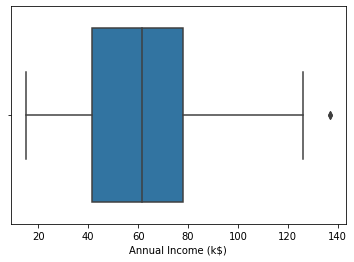

In [26]:
sns.boxplot(data['Annual Income (k$)'])

In [27]:
q = data.quantile([0.75,0.25])

In [28]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [29]:
iqr =  q.iloc[0] - q.iloc[1] 

In [30]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [31]:
u = q.iloc[0] + (1.5*iqr)   

In [32]:
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [33]:
l = q.iloc[1] - (1.5*iqr) 

In [34]:
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [35]:
data['Annual Income (k$)'] = np.where(np.logical_or(data['Annual Income (k$)']>132.75,data['Annual Income (k$)']<-13.250), 61.5,data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


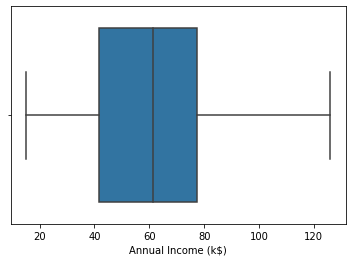

In [36]:
sns.boxplot(data['Annual Income (k$)'])

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender']) 

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(data)

In [40]:
x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [41]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster = KM.fit_predict(x_scaled)

In [42]:
cluster

array([6, 6, 5, 5, 5, 5, 0, 5, 2, 5, 2, 5, 0, 5, 6, 6, 5, 6, 2, 5, 6, 6,
       0, 6, 0, 6, 0, 6, 0, 5, 2, 5, 2, 6, 0, 5, 0, 5, 0, 5, 0, 6, 2, 5,
       0, 5, 0, 5, 5, 5, 0, 6, 5, 2, 0, 2, 0, 2, 5, 2, 2, 6, 0, 0, 2, 6,
       0, 0, 6, 5, 2, 0, 0, 0, 2, 6, 0, 2, 5, 0, 2, 6, 2, 0, 5, 2, 0, 5,
       5, 0, 0, 6, 2, 0, 0, 6, 0, 5, 2, 6, 5, 0, 2, 6, 2, 5, 0, 2, 2, 2,
       2, 7, 0, 6, 7, 7, 0, 0, 0, 0, 1, 4, 7, 1, 4, 7, 3, 1, 3, 1, 3, 1,
       4, 7, 3, 7, 4, 1, 3, 7, 4, 1, 4, 7, 3, 1, 3, 7, 4, 1, 3, 1, 4, 7,
       4, 7, 3, 7, 3, 7, 4, 7, 3, 7, 3, 7, 3, 7, 4, 1, 3, 1, 3, 1, 4, 7,
       3, 1, 3, 1, 4, 7, 3, 7, 4, 1, 4, 1, 4, 7, 4, 7, 3, 7, 4, 7, 4, 1,
       3, 1], dtype=int32)

In [43]:
value = data.columns


In [44]:
value

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [45]:
data1 = pd.DataFrame(x_scaled, columns = value)

In [46]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


In [47]:
data1['Cluster_value'] = pd.Series(cluster)

In [48]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,0.000000,1.0,0.019231,0.000000,0.387755,6
1,0.005025,1.0,0.057692,0.000000,0.816327,6
2,0.010050,0.0,0.038462,0.009009,0.051020,5
3,0.015075,0.0,0.096154,0.009009,0.775510,5
4,0.020101,0.0,0.250000,0.018018,0.397959,5


# split the data in X and Y

In [51]:
y = data1['Cluster_value']
data1 = data1.drop(['CustomerID','Cluster_value'], axis = 1)
x = data1
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.418919,0.173469


In [54]:
y

0      6
1      6
2      5
3      5
4      5
      ..
195    7
196    4
197    1
198    3
199    1
Name: Cluster_value, Length: 200, dtype: int32

# Split x and y into Training and Testing

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [55]:
x_train

array([[0.65829146, 1.        , 0.40384615, 0.5045045 , 0.75510204],
       [0.48241206, 0.        , 0.55769231, 0.40540541, 0.46938776],
       [0.90954774, 0.        , 0.26923077, 0.73873874, 0.86734694],
       [0.09547739, 0.        , 0.32692308, 0.07207207, 0.98979592],
       [0.76884422, 0.        , 0.38461538, 0.56756757, 0.76530612],
       [0.46231156, 1.        , 0.57692308, 0.40540541, 0.48979592],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.81909548, 0.        , 0.25      , 0.59459459, 0.93877551],
       [0.25628141, 1.        , 0.28846154, 0.24324324, 0.60204082],
       [0.4321608 , 0.        , 0.71153846, 0.37837838, 0.58163265],
       [0.69849246, 0.        , 0.32692308, 0.53153153, 0.7244898 ],
       [0.45226131, 0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.68844221, 1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.50753769, 0.        , 0.59615385, 0.42342342, 0.47959184],
       [0.72361809, 1.        , 0.

In [56]:
x_train.shape

(140, 5)

In [57]:
x_test

array([[0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.85427136, 1.        , 0.42307692, 0.64864865, 0.12244898],
       [0.53768844, 1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.49246231, 1.        , 0.57692308, 0.41441441, 0.41836735],
       [0.88944724, 1.        , 0.17307692, 0.65765766, 0.69387755],
       [0.91457286, 1.        , 0.53846154, 0.74774775, 0.14285714],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.73366834, 1.        , 0.57692308, 0.55855856, 0.35714286],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.7638191 , 0.        , 0.5       , 0.56756757, 0.19387755],
       [0.30653266, 1.        , 0.01923077, 0.27927928, 0.55102041],
       [0.6281407 , 0.        , 0.25      , 0.4954955 , 0.7755102 ],
       [0.90452261, 0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.77386935, 0.        , 0.55769231, 0.56756757, 0.15306122],
       [0.40201005, 1.        , 0.

In [58]:
x_test.shape

(60, 5)

In [59]:
y_train

131    1
96     0
181    7
19     5
153    7
      ..
67     0
192    3
117    0
47     5
172    3
Name: Cluster_value, Length: 140, dtype: int32

In [60]:
y_test

18     2
170    3
107    2
98     2
177    1
182    3
5      5
146    3
12     0
152    4
61     6
125    7
180    4
154    4
80     2
7      5
33     6
130    3
37     5
74     2
183    7
145    1
45     5
159    7
60     2
123    1
179    1
185    1
122    7
44     0
16     5
55     2
150    3
111    7
22     0
189    7
129    1
4      5
83     0
106    0
134    3
66     0
26     0
113    6
168    4
63     0
8      2
75     6
118    0
143    7
71     0
124    4
184    4
97     5
149    1
24     0
30     2
160    4
40     0
56     0
Name: Cluster_value, dtype: int32

# Building the Model

# Multi linear regression model

In [61]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [62]:
pred = mlr.predict(x_test)

In [63]:
pred

array([ 1.53323109,  2.80690516,  1.8565829 ,  2.3810273 ,  4.85716047,
        2.40457362,  5.18478087,  2.32924853,  0.86594736,  2.59501303,
        5.26018046,  4.67734475,  3.64258844,  2.23877886,  1.6237804 ,
        5.36410217,  5.81393497,  1.99941241,  4.5206725 ,  1.40650397,
        5.23794909,  5.14596003,  5.02388512,  4.67744765,  0.41808687,
        3.97875515,  4.4882997 ,  5.1481612 ,  3.53524217,  2.0972225 ,
        3.35219377,  2.35973635,  2.5211107 ,  5.42597902,  1.90064557,
        4.58677261,  3.84151181,  3.7983955 ,  2.68804837,  0.91292158,
        4.52985393,  3.04363641,  2.43054754,  5.17947289,  3.54241616,
        2.12600834, -0.01655848,  4.65108194,  2.24853806,  4.74421773,
        2.53507758,  4.73382639,  3.380567  ,  4.62423475,  4.46699905,
        1.31650018,  0.46516803,  1.64839348,  0.67868937,  2.26071121])

In [64]:
y_test

18     2
170    3
107    2
98     2
177    1
182    3
5      5
146    3
12     0
152    4
61     6
125    7
180    4
154    4
80     2
7      5
33     6
130    3
37     5
74     2
183    7
145    1
45     5
159    7
60     2
123    1
179    1
185    1
122    7
44     0
16     5
55     2
150    3
111    7
22     0
189    7
129    1
4      5
83     0
106    0
134    3
66     0
26     0
113    6
168    4
63     0
8      2
75     6
118    0
143    7
71     0
124    4
184    4
97     5
149    1
24     0
30     2
160    4
40     0
56     0
Name: Cluster_value, dtype: int32

# Performance metrics

In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [66]:
mse= mean_squared_error(y_test,pred)
mse


3.649618923235332

In [ ]:
rmse = np.sqrt(mse)
rmse

1.7956315737622144

In [ ]:
r2_score(y_test,pred)


0.46011842347486687